(esercizi-logistic-reg)=
# ✏️ Esercizi

In [6]:
suppressPackageStartupMessages({
    library("tidyverse")
    library("car")
    library("LaplacesDemon")
    library("gmodels")
    library("effects")
    library("psych")
    library("epitools")
    })

**E1.** Per chiarire il significato del coefficiente $\beta$ nel caso della regressione logistica, si utilizzino i dati `chdage` e si ripeta l'analisi precedente dicotomizzando l'età in funzione della media.

In [2]:
chdage <- read.table("../../data/logistic_reg/chdage_dat.txt", header = TRUE)
chdage |>
    head()

,id,age,chd
,<int>,<int>,<int>
1,1,20,0
2,2,23,0
3,3,24,0
4,5,25,1
5,4,25,0
6,7,26,0


In [3]:
# Calcolo della media dell'età
media_eta <- mean(chdage$age)

# Creazione di una variabile dicotomica per l'età
chdage$eta_categoria <- ifelse(chdage$age > media_eta, "SopraMedia", "SottoMedia")

# Visualizzazione della tavola 2x2
table(chdage$eta_categoria, chdage$chd)

            
              0  1
  SopraMedia 16 32
  SottoMedia 41 11

Analizziamo la relazione tra le due variabili categoriche (età categorizzata e CHD) utilizzando una tavola di contingenza 2x2 e il test del chi-quadrato.

In [4]:
gmodels::CrossTable(chdage$eta_categoria, chdage$chd, chisq = TRUE, missing.include = TRUE)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
                     | chdage$chd 
chdage$eta_categoria |         0 |         1 | Row Total | 
---------------------|-----------|-----------|-----------|
          SopraMedia |        16 |        32 |        48 | 
                     |     4.717 |     6.252 |           | 
                     |     0.333 |     0.667 |     0.480 | 
                     |     0.281 |     0.744 |           | 
                     |     0.160 |     0.320 |           | 
---------------------|-----------|-----------|-----------|
          SottoMedia |        41 |        11 |        52 | 
                     |     4.354 |     5.771 |           | 
                     |     0.788 |     0.212 |     0.520 | 
                     |     0.719 |     0.256 |    

Calcoliamo l'odds ratio per valutare le probabilità relative di CHD tra le due categorie di età.

In [7]:
epitools::oddsratio(chdage$eta_categoria, chdage$chd, conf.level = 0.95, method = "wald") |> print()

$data
            Outcome
Predictor     0  1 Total
  SopraMedia 16 32    48
  SottoMedia 41 11    52
  Total      57 43   100

$measure
            odds ratio with 95% C.I.
Predictor     estimate      lower     upper
  SopraMedia 1.0000000         NA        NA
  SottoMedia 0.1341463 0.05475114 0.3286733

$p.value
            two-sided
Predictor      midp.exact fisher.exact   chi.square
  SopraMedia           NA           NA           NA
  SottoMedia 4.582028e-06 6.194004e-06 4.371863e-06

$correction
[1] FALSE

attr(,"method")
[1] "Unconditional MLE & normal approximation (Wald) CI"


Creiamo un modello di regressione logistica per stimare l'odds ratio, ponendo CHD come variabile dipendente e l'età categorizzata come variabile indipendente. Il coefficiente del modello sarà interpretato come log odds.

In [8]:
logit_model <- glm(formula = chd ~ eta_categoria, data = chdage, family = binomial(link = "logit"))
summary(logit_model)


Call:
glm(formula = chd ~ eta_categoria, family = binomial(link = "logit"), 
    data = chdage)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)               0.6931     0.3062   2.264   0.0236 *  
eta_categoriaSottoMedia  -2.0088     0.4572  -4.394 1.12e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 136.66  on 99  degrees of freedom
Residual deviance: 114.77  on 98  degrees of freedom
AIC: 118.77

Number of Fisher Scoring iterations: 4


Generiamo l'intervallo di confidenza al 95%

In [9]:

confint(logit_model)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.108547,1.318141
eta_categoriaSottoMedia,-2.942187,-1.140921


Esponenziazione dei coefficienti per ottenere l'Odds Ratio

In [10]:
exp(coef(logit_model))     # Odds Ratio
exp(confint(logit_model))  # 95% CI (Odds Ratio)

(Intercept) eta_categoriaSottoMedia 
              2.0000000               0.1341463

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),1.11465733,3.7364701
eta_categoriaSottoMedia,0.05275022,0.3195247


Nella regressione logistica, il coefficiente $\beta$ per la variabile esplicativa dicotomica (in questo caso, l'età categorizzata) indica la variazione dei log odds di CHD per la categoria "SopraMedia" rispetto alla categoria "SottoMedia". Esponenziando questo coefficiente, si ottiene l'odds ratio, che rappresenta la variazione relativa del rischio (o delle probabilità) di CHD tra le due categorie di età.

Ricordiamo che l'interpretazione deve tenere conto del significato statistico e della grandezza dell'odds ratio, oltre che della posizione dell'intervallo di confidenza rispetto al valore neutro 1. Se l'intervallo di confidenza attraversa 1, la differenza non è statisticamente significativa.

Un odds ratio di 1.13 può essere interpretato nel modo seguente: passando dalla categoria 'SottoMedia' a quella 'SopraMedia', gli odds di malattie coronariche aumentano del 13%. L'intervallo di confidenza al 95% per l'odds ratio si estende da 1.05 a 1.32. Questo significa che siamo il 95% confidenti che il vero incremento degli odds di malattie coronariche, passando dalla categoria 'SottoMedia' a 'SopraMedia', sia compreso tra il 5% e il 32%.

**E2.** Prendiamo in considerazione lo studio condotto da Cowles e Davis (1987). In questo studio, gli autori hanno intervistato un campione di 1421 studenti universitari per determinare se fossero disposti, in linea di principio, a partecipare a ulteriori ricerche. La variabile di risposta, chiamata `volunteer`, è una variabile dicotomica che indica se gli studenti erano disposti o meno a partecipare. Inoltre, hanno misurato i livelli di neuroticismo ed estroversione utilizzando l'Inventario della personalità di Eysenck. I dati relativi a questo studio sono disponibili nel data frame chiamato `Cowles` all'interno del pacchetto `R` chiamato `effects`.

Il problema chiede di costruire un modello GLM (Generalized Linear Model) che possa prevedere la probabilità di essere disposti a partecipare (`volunteer`) in base al genere degli studenti, tenendo conto dei livelli di neuroticismo ed estroversione, nonché della loro interazione. Questo modello ci permetterà di comprendere come queste variabili influenzino la probabilità di partecipazione degli studenti a ulteriori ricerche.

Dopo aver costruito il modello, il problema chiede interpretare i risultati ottenuti per comprendere come il genere, il neuroticismo e l'estroversione influenzino la volontà degli studenti di partecipare a ulteriori ricerche.

In [11]:
data(Cowles)
dim(Cowles)

[1] 1421    4

In [12]:
head(Cowles)

,neuroticism,extraversion,sex,volunteer
,<int>,<int>,<fct>,<fct>
1,16,13,female,no
2,8,14,male,no
3,5,16,male,no
4,8,20,female,no
5,9,19,male,no
6,6,15,male,no


In [13]:
Cowles$sex <- relevel(Cowles$sex, ref = "male")
contrasts(Cowles$sex)

,female
male,0
female,1


In [14]:
fit_cowles <- glm(
    volunteer ~ sex + neuroticism*extraversion,
    family = binomial,
    data = Cowles
)
summary(fit_cowles)


Call:
glm(formula = volunteer ~ sex + neuroticism * extraversion, family = binomial, 
    data = Cowles)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -2.605359   0.500719  -5.203 1.96e-07 ***
sexfemale                 0.247152   0.111631   2.214  0.02683 *  
neuroticism               0.110777   0.037648   2.942  0.00326 ** 
extraversion              0.166816   0.037719   4.423 9.75e-06 ***
neuroticism:extraversion -0.008552   0.002934  -2.915  0.00355 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1933.5  on 1420  degrees of freedom
Residual deviance: 1897.4  on 1416  degrees of freedom
AIC: 1907.4

Number of Fisher Scoring iterations: 4


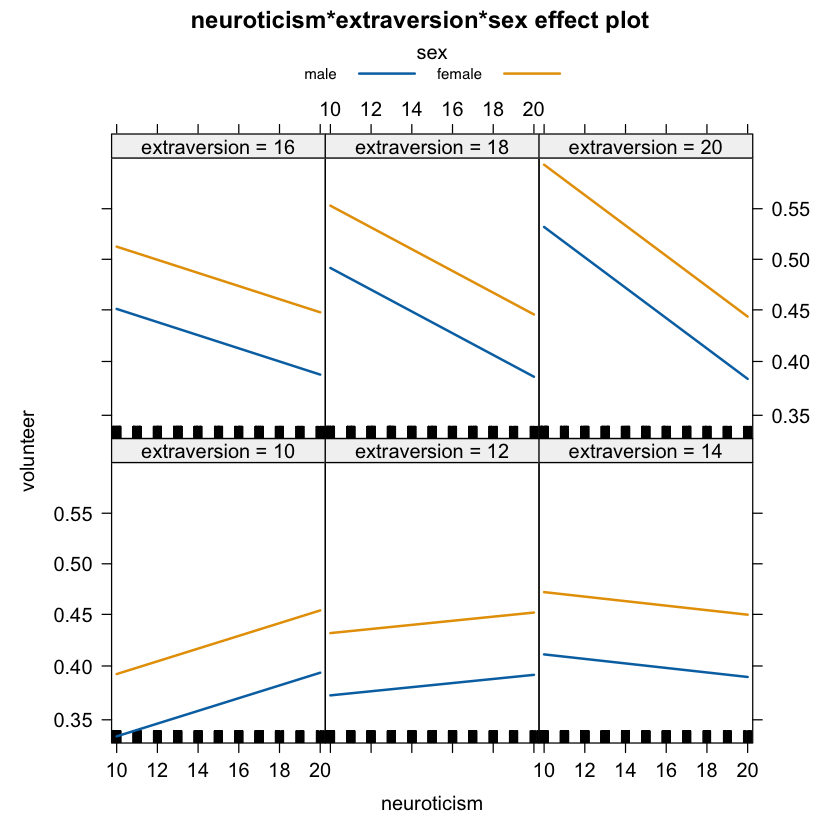

In [15]:
plot(Effect(focal.predictors = c("neuroticism","extraversion","sex"), 
            mod = fit_cowles,
            xlevels=list(extraversion=seq(10, 20, 2), neuroticism=10:20)),
     multiline = TRUE)

Calcoliamo l'Odds Ratio:

In [16]:
exp(coef(fit_cowles)) |> print()

             (Intercept)                sexfemale              neuroticism 
              0.07387658               1.28037375               1.11714535 
            extraversion neuroticism:extraversion 
              1.18153740               0.99148400 


Calcoliamo il 95% CI dell'Odds Ratio:

In [17]:
exp(confint(fit_cowles)) |> print()

Waiting for profiling to be done...



                              2.5 %    97.5 %
(Intercept)              0.02723627 0.1943229
sexfemale                1.02911058 1.5942774
neuroticism              1.03815341 1.2034925
extraversion             1.09828160 1.2735034
neuroticism:extraversion 0.98575501 0.9971703


Gli odds ratio ottenuti dal modello di regressione logistica possono essere interpretati come segue: in questo campione di studio, gli odds di partecipare a ulteriori ricerche sono risultati essere 1.28 volte più alti per le femmine rispetto ai maschi, quando vengono controllati gli effetti del neuroticismo e dell'estroversione, nonché della loro interazione.

L'intervallo di confidenza al 95% per l'odds ratio è compreso tra 1.03 e 1.59. Questo significa che siamo sicuri al 95% che il reale aumento degli odds di partecipare a ulteriori ricerche per le femmine rispetto ai maschi, una volta che si tengono in considerazione gli effetti del neuroticismo, dell'estroversione e della loro interazione, varia tra il 3% e il 59%.

In altre parole, ci sono evidenze statistiche significative che suggeriscono che il genere ha un impatto sulla volontà di partecipare a ulteriori ricerche, e tale impatto è positivo per le femmine rispetto ai maschi, anche quando si considerano le influenze dei livelli di neuroticismo ed estroversione e della loro interazione.